**Step 1: Data loading**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('historic.csv')
df


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...,...
7995,280947,T-Shirt,Catalog,Blue,3.9,flop
7996,874952,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,891640,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,786448,Blouse,Category_Highlight,Blue,2.6,flop


**Step 2: Data Exploration**

In [4]:
# basic information about dataset
print(df.info())

# summary statistics displaying
print(df.describe())

# missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB
None
             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000
item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator   

**Step 3: Target Variable Analysis**

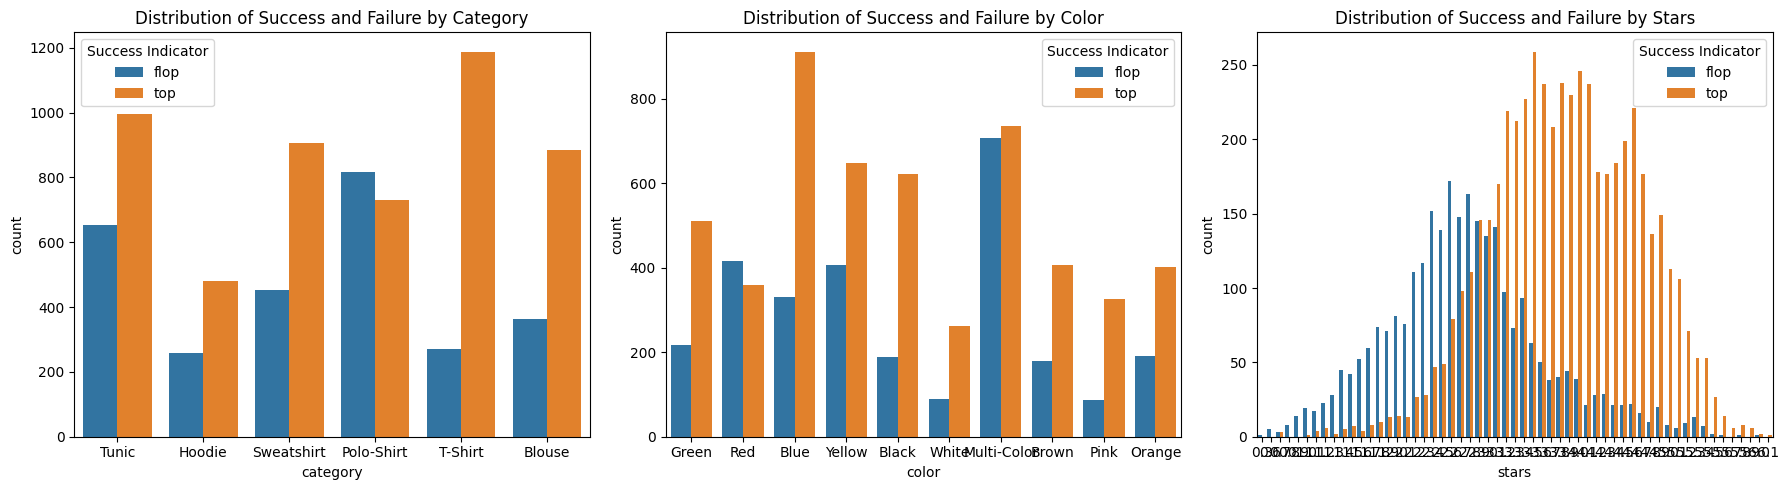

In [55]:
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Countplot for the 'category' feature
sns.countplot(x='category', hue='success_indicator', data=df, ax=axes[0])
axes[0].set_title('Distribution of Success and Failure by Category')
axes[0].legend(title='Success Indicator')

# Countplot for the 'color' feature
sns.countplot(x='color', hue='success_indicator', data=df, ax=axes[1])
axes[1].set_title('Distribution of Success and Failure by Color')
axes[1].legend(title='Success Indicator')

# Countplot for the 'stars' feature
sns.countplot(x='stars', hue='success_indicator', data=df, ax=axes[2])
axes[2].set_title('Distribution of Success and Failure by Stars')
axes[2].legend(title='Success Indicator')

# Adjust layout
plt.tight_layout()
plt.show()



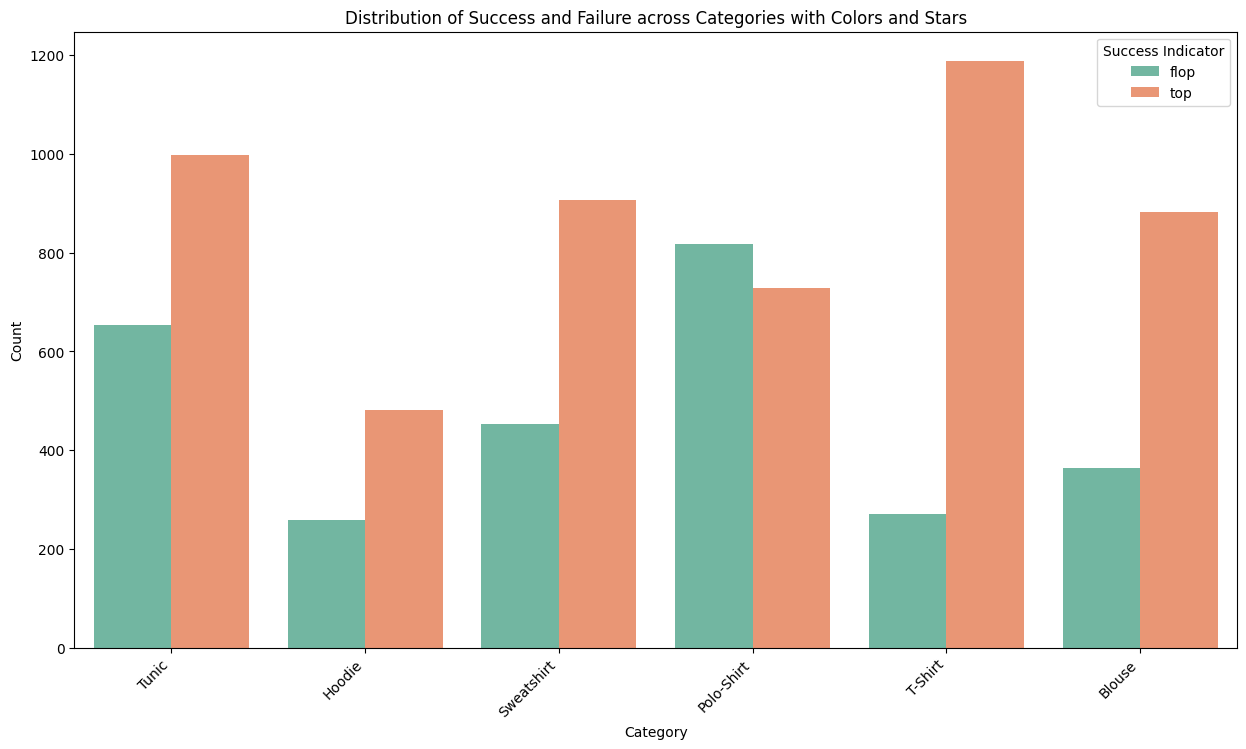

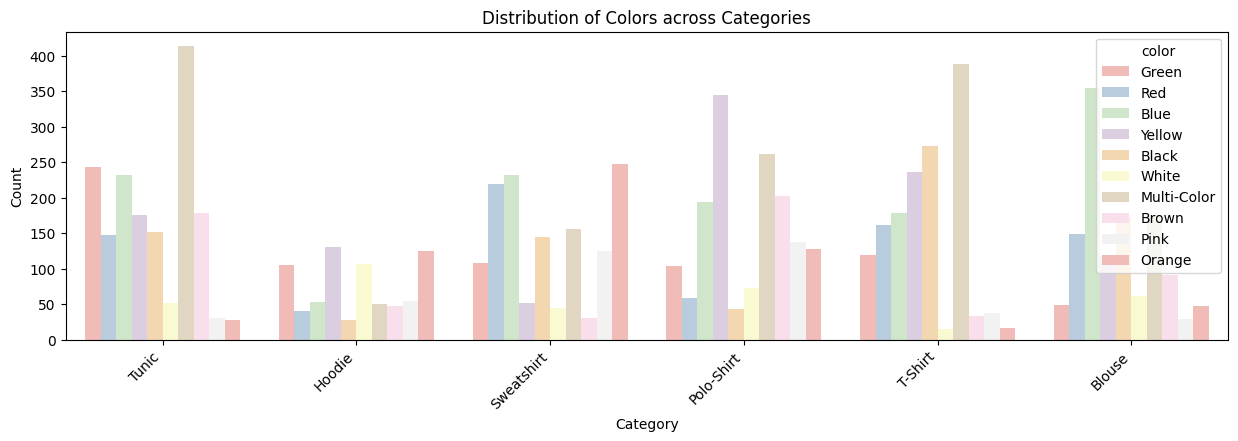

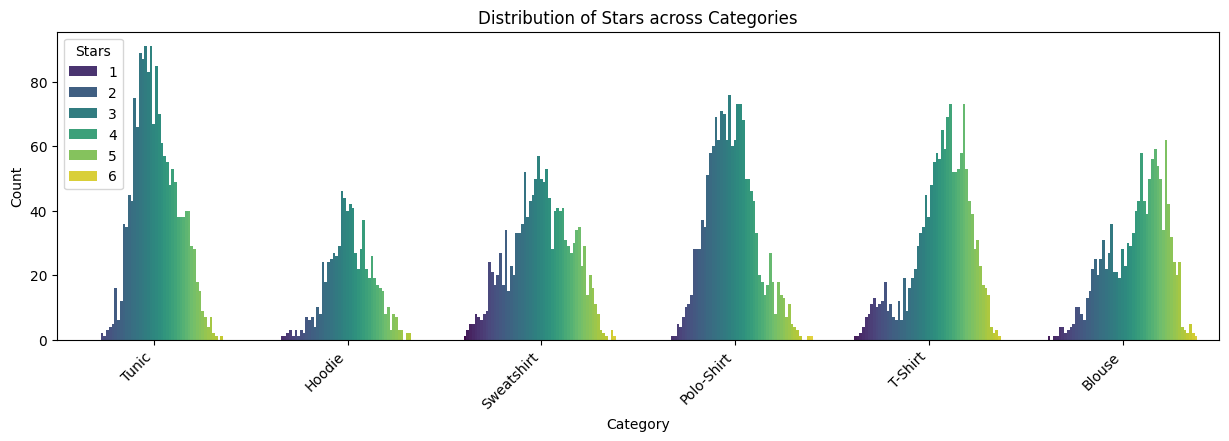

In [44]:
# Countplot for the target variable, 'category', 'colors', and 'stars' features
plt.figure(figsize=(15, 8))

# Create a grouped bar plot
sns.countplot(x='category', hue='success_indicator', data=df, palette='Set2')  # Adjust palette as needed
plt.title('Distribution of Success and Failure across Categories with Colors and Stars')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Success Indicator')
plt.xticks(rotation=45, ha='right')

# Add 'colors' information as a subplot on top of the existing plot
plt.figure(figsize=(15, 4))
sns.countplot(x='category', hue='color', data=df, palette='Pastel1')  # Adjust palette as needed
plt.title('Distribution of Colors across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='color')
plt.xticks(rotation=45, ha='right')

# Add 'stars' information as a subplot on top of the existing plot
plt.figure(figsize=(15, 4))
sns.countplot(x='category', hue='stars', data=df, palette='viridis')  # Adjust palette as needed
plt.title('Distribution of Stars across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Stars')
plt.xticks(rotation=45, ha='right')

plt.show()



**Step4 : Feature Extraction**

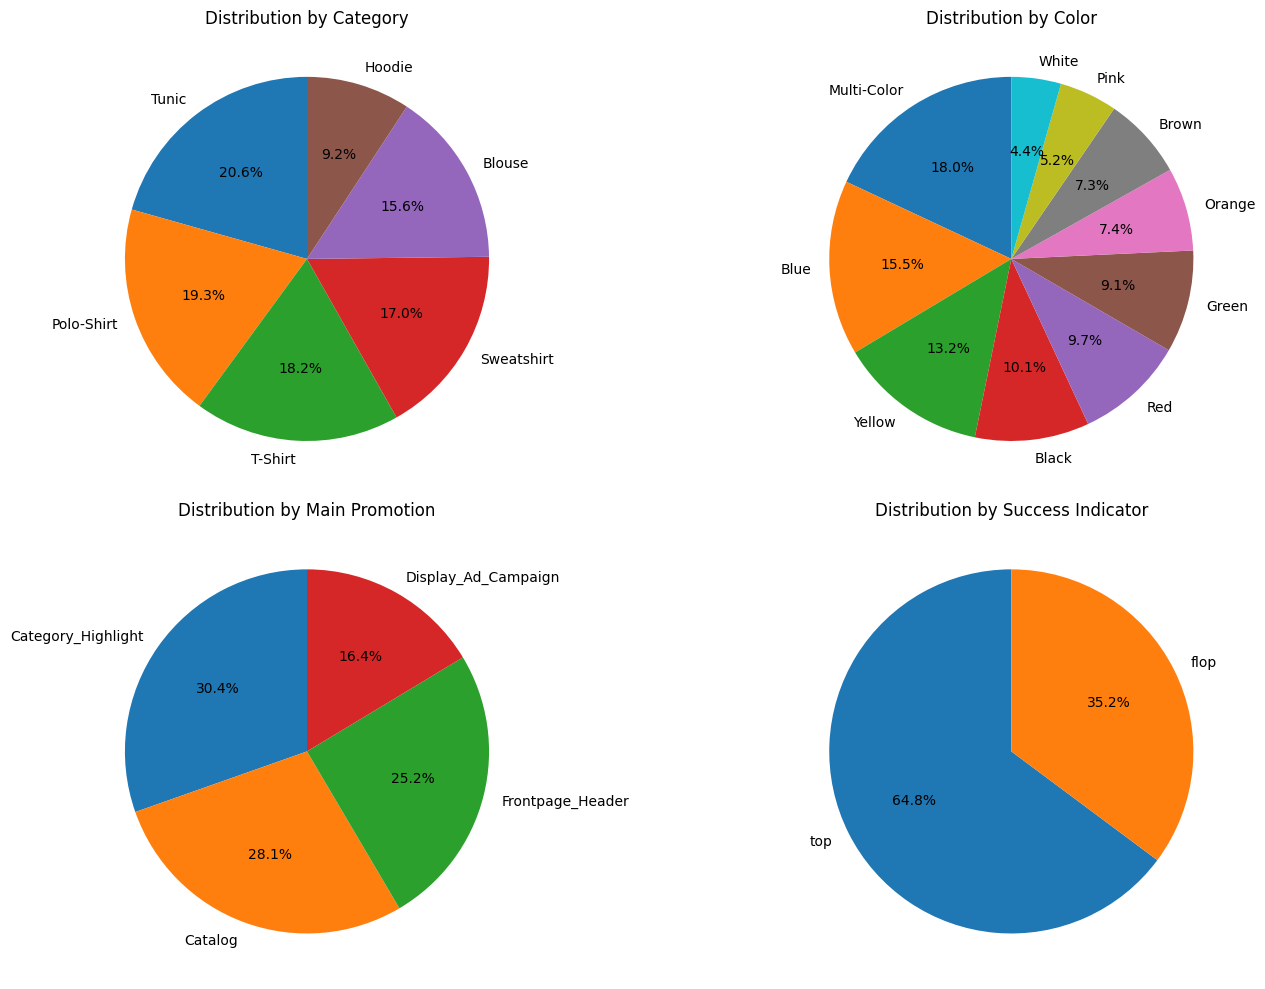

In [48]:
# Prepare data for comparison
category_counts = historic_data['category'].value_counts()
color_counts = historic_data['color'].value_counts()
promotion_counts = historic_data['main_promotion'].value_counts()
success_counts = historic_data['success_indicator'].value_counts()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for 'category'
axes[0, 0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution by Category')

# Plot for 'color'
axes[0, 1].pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution by Color')

# Plot for 'main_promotion'
axes[1, 0].pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution by Main Promotion')

# Plot for 'success_indicator'
axes[1, 1].pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution by Success Indicator')

# Adjust layout
plt.tight_layout()
plt.show()






**Step 5: Correlation Matrix**

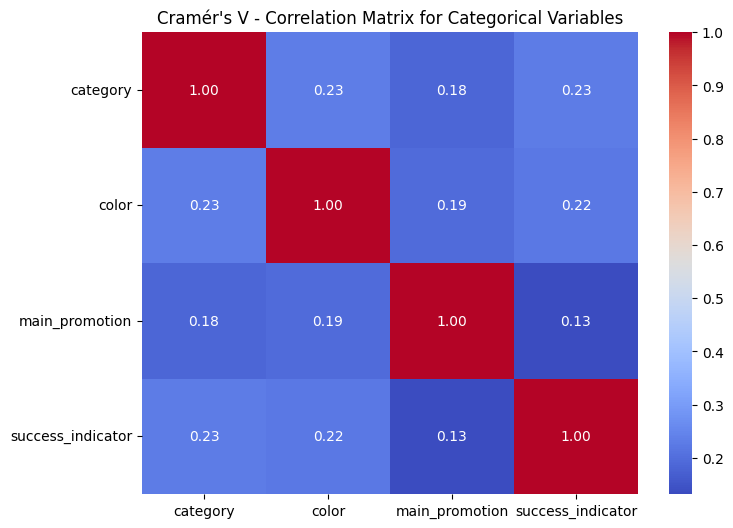

In [50]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of categorical variables
correlation_matrix = pd.DataFrame(index=['category', 'color', 'main_promotion', 'success_indicator'], columns=['category', 'color', 'main_promotion', 'success_indicator'])

for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
        correlation_matrix.loc[i, j] = cramers_v(historic_data[i], historic_data[j])

# Convert the values in the correlation matrix to numeric
correlation_matrix = correlation_matrix.astype(float)

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V - Correlation Matrix for Categorical Variables")
plt.show()
